In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
#!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
FuelConsumption ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [4]:
df=pd.read_csv(FuelConsumption)

In [18]:
df.dtypes
df["FUELCONSUMPTION_COMB_MPG"]=df["FUELCONSUMPTION_COMB_MPG"].astype(float)
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG    float64
CO2EMISSIONS                  int64
dtype: object

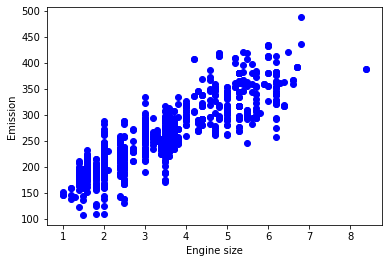

In [7]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly=PolynomialFeatures(degree=2)
train=poly.fit_transform(df[["ENGINESIZE"]])
train

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [10]:
ln=linear_model.LinearRegression()
ln.fit(train,df["CO2EMISSIONS"])
yhat=ln.predict(train)

In [11]:
from sklearn.metrics import r2_score
r2_score(df["CO2EMISSIONS"],yhat)

0.7666343024144855

In [12]:
ln.score(train,df["CO2EMISSIONS"])

0.7666343024144855

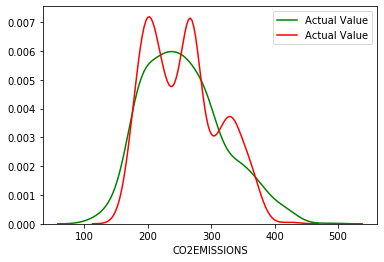

In [13]:
import seaborn as sns
ax1=sns.distplot(df["CO2EMISSIONS"],hist=False,color="green",label="Actual Value")
sns.distplot(yhat,hist=False,color="red",label="Actual Value",ax=ax1)

Order: 1


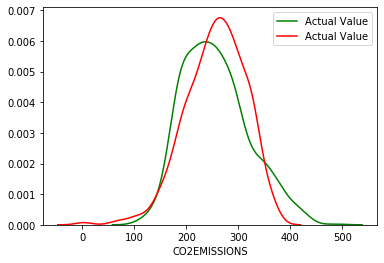

Order: 2


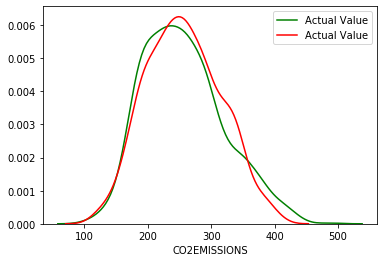

Order: 3


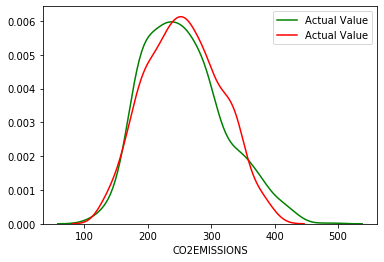

Order: 4


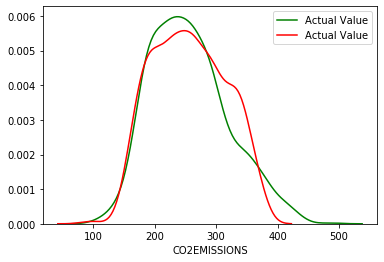

Order: 5


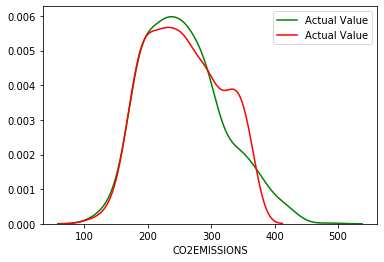

Order: 6


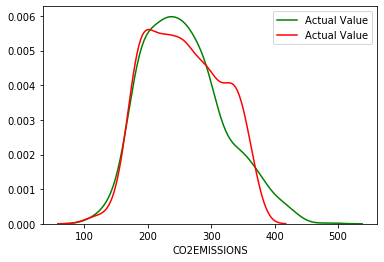

Order: 7


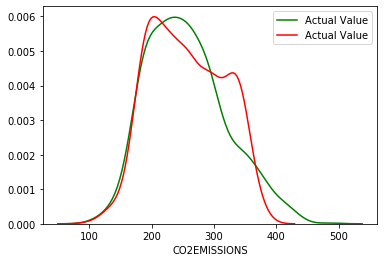

Order: 8


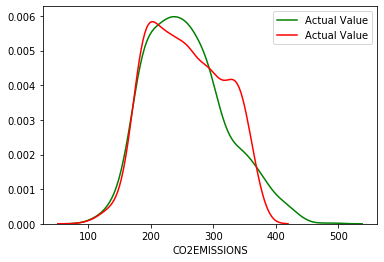

Order: 9


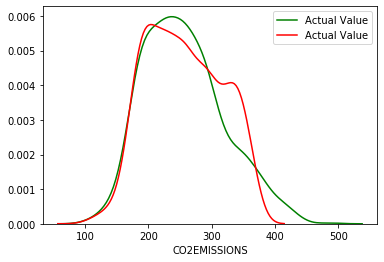

Order: 10


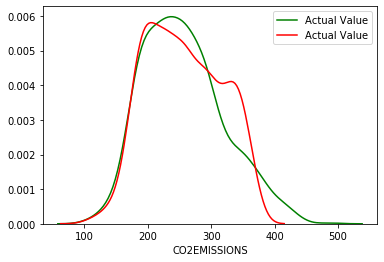

Order: 11


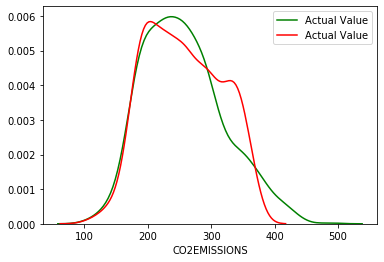

Order: 12


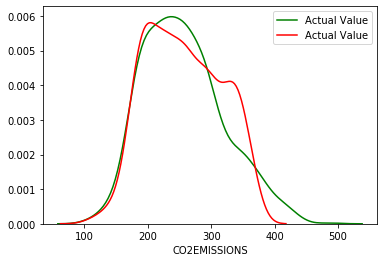

Order: 13


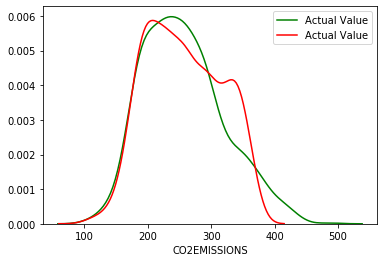

Order: 14


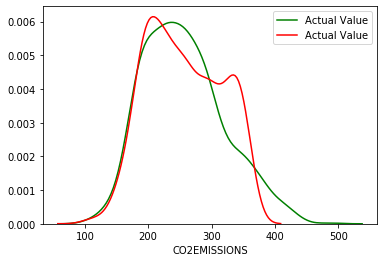

Order: 15


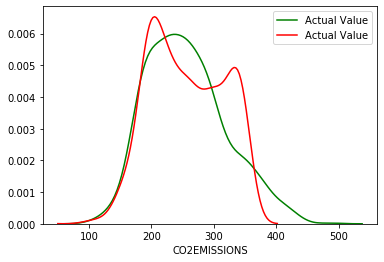

Order: 16


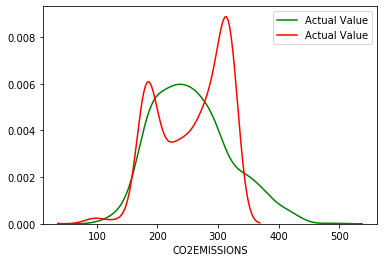

Order: 17


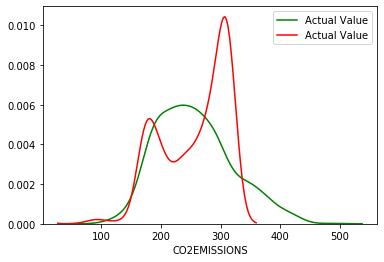

Order: 18


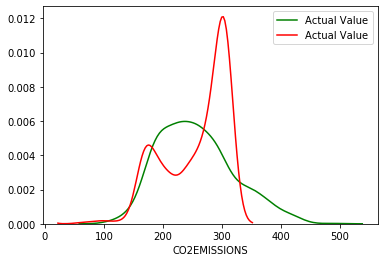

Order: 19


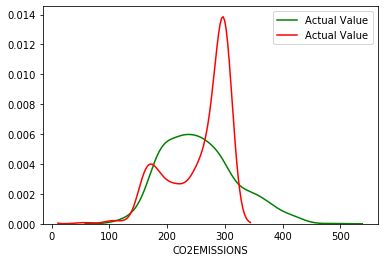

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0.7827893710276209, 0.8264994177921059, 0.8275483898353854, 0.8358266964897371, 0.8378939739573964, 0.8385934509895148, 0.8401073165171277, 0.8391223931331, 0.8389735460546173, 0.8390866273975481, 0.8390424790084374, 0.8390588696729632, 0.8391342914643932, 0.8381410388508379, 0.8341514951488838, 0.7426074081111121, 0.686504872941937, 0.6166642430370001, 0.5329930735697135]
[715.9902728365515, 593.2112957661415, 590.1523099590382, 565.8179049760635, 559.6869711462492, 557.6075187184424, 553.2242930362862, 556.0330736709775, 556.4766275060923, 556.1398769435102, 556.2713909187529, 556.2272734574269, 556.0530080051226, 559.0237229855737, 570.8160001163328, 821.3287819837017, 957.6225285640336, 1111.8415421470804, 1277.2714066646038]


In [40]:
from sklearn.metrics import mean_squared_error
order1=list(range(1,20))
r_value=[]
MSE=[]
for n in order1:
    poly=PolynomialFeatures(degree=n)
    x=poly.fit_transform(df[["FUELCONSUMPTION_COMB_MPG"]])
    ln=linear_model.LinearRegression()
    ln.fit(x,df["CO2EMISSIONS"])
    yhat=ln.predict(x)
    print("Order:",n)
    ax1=sns.distplot(df["CO2EMISSIONS"],hist=False,color="green",label="Actual Value")
    sns.distplot(yhat,hist=False,color="red",label="Actual Value",ax=ax1)
    plt.show()
    r_value.append(r2_score(yhat,df["CO2EMISSIONS"]))
    MSE.append(mean_squared_error(df["CO2EMISSIONS"],yhat))


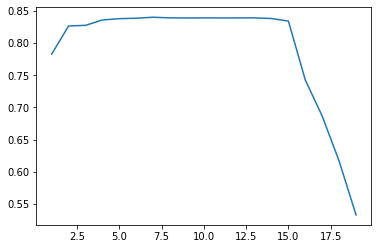

In [44]:

plt.plot(order1,r_value)


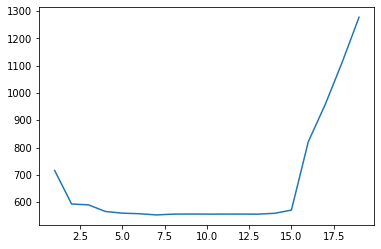

In [45]:
plt.plot(order1,MSE)